In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARMA

In [2]:
data = pd.read_csv("DK-DK2.csv")

In [3]:
data["datetime"] = pd.to_datetime(data['datetime'])
data["datetime"] = data["datetime"].dt.date

# Exploration and cleaning

In [4]:
data.head()

,datetime,timestamp,zone_name,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_discharge_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_storage_avg,...,latest_forecasted_wind_y_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,2014-12-11,1418338800,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-12,1418342400,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-12,1418346000,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-12,1418349600,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-12,1418353200,DK-DK2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Y = data.carbon_intensity_avg

In [6]:
dropColumns =[]
for i in range(len(data.columns)):
    if len(data[data.columns[i]].unique())< 5 or (data[data.columns[i]].isna().sum()>1000):
        dropColumns.append(data.columns[i])
        print(data.columns[i],i)

zone_name 2
carbon_intensity_discharge_avg 5
total_storage_avg 9
total_discharge_avg 10
production_sources 14
power_production_hydro_avg 20
power_production_nuclear_avg 21
power_production_geothermal_avg 25
power_production_unknown_avg 26
power_net_discharge_hydro_avg 49
power_net_import_SE-SE4_avg 53
latest_forecasted_dewpoint_avg 54
latest_forecasted_precipitation_avg 55
latest_forecasted_solar_avg 56
latest_forecasted_temperature_avg 57
latest_forecasted_wind_x_avg 58
latest_forecasted_wind_y_avg 59
latest_forecasted_power_net_import_SE_avg 65


In [7]:
data = data.drop(dropColumns,axis=1)

In [8]:
data.head()

,datetime,timestamp,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_import_avg,total_export_avg,total_consumption_avg,...,power_net_import_DK-DK1_avg,power_net_import_SE_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,2014-12-11,1418338800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-12,1418342400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-12,1418346000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-12,1418349600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-12,1418353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


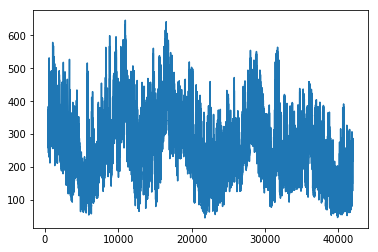

In [9]:
plt.plot(data["carbon_intensity_avg"])

In [10]:
data.isna().sum()

datetime                                           0
timestamp                                          0
carbon_intensity_avg                             486
carbon_intensity_production_avg                  485
carbon_intensity_import_avg                      551
carbon_rate_avg                                  512
total_production_avg                             485
total_import_avg                                 506
total_export_avg                                 506
total_consumption_avg                            511
power_origin_percent_fossil_avg                  486
power_origin_percent_renewable_avg               486
power_production_biomass_avg                     485
power_production_coal_avg                        485
power_production_gas_avg                         485
power_production_oil_avg                         485
power_production_solar_avg                       485
power_production_wind_avg                        485
power_consumption_biomass_avg                 

In [12]:
dataClean = data.dropna()
dataClean = dataClean.reset_index(drop=True)

#  Multivariate analysis


In [13]:
dataClean.head()

,datetime,timestamp,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_import_avg,total_export_avg,total_consumption_avg,...,power_net_import_DK-DK1_avg,power_net_import_SE_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,2015-01-06,1420585200,417.740436,401.881690,455.272800,5.643130e+08,1420.0,600.00,669.13,1350.87,...,-201.94,-467.19,26.35,1337.0,1367.0,600.0,3.0,-633.0,0.0,583.0
1,2015-01-07,1420588800,422.300334,404.624823,463.837785,5.539398e+08,1410.0,600.00,698.28,1311.72,...,-155.81,-542.47,26.08,1237.0,1298.0,600.0,0.0,-574.0,0.0,537.0
2,2015-01-07,1420592400,425.887776,411.166898,461.316025,5.447403e+08,1444.0,600.00,764.93,1279.07,...,-145.79,-619.14,26.03,1192.0,1264.0,600.0,0.0,-583.0,0.0,473.0
3,2015-01-07,1420596000,416.527319,412.063264,423.263523,5.501701e+08,1391.0,921.81,991.96,1320.85,...,321.81,-991.96,26.17,1161.0,1274.0,600.0,372.0,-954.0,0.0,407.0
4,2015-01-07,1420599600,417.642143,430.836240,399.496425,5.835004e+08,1319.0,959.07,880.94,1397.13,...,468.07,-880.94,26.74,1080.0,1323.0,600.0,590.0,-1023.0,0.0,324.0


In [45]:
mData = dataClean.drop(["datetime","timestamp"], axis=1)


In [16]:
cm = np.corrcoef(mData)

In [ ]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True,square=True,fmt=
                '.2f',annot_kws=['size:15'])
plt.show()

In [ ]:
cm.shape

In [ ]:
plt.imshow(cm)

In [24]:
mData.head()

,timestamp,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_import_avg,total_export_avg,total_consumption_avg,power_origin_percent_fossil_avg,...,power_net_import_DK-DK1_avg,power_net_import_SE_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,1420585200,417.740436,401.881690,455.272800,5.643130e+08,1420.0,600.00,669.13,1350.87,56.664227,...,-201.94,-467.19,26.35,1337.0,1367.0,600.0,3.0,-633.0,0.0,583.0
1,1420588800,422.300334,404.624823,463.837785,5.539398e+08,1410.0,600.00,698.28,1311.72,57.246913,...,-155.81,-542.47,26.08,1237.0,1298.0,600.0,0.0,-574.0,0.0,537.0
2,1420592400,425.887776,411.166898,461.316025,5.447403e+08,1444.0,600.00,764.93,1279.07,57.490938,...,-145.79,-619.14,26.03,1192.0,1264.0,600.0,0.0,-583.0,0.0,473.0
3,1420596000,416.527319,412.063264,423.263523,5.501701e+08,1391.0,921.81,991.96,1320.85,56.074781,...,321.81,-991.96,26.17,1161.0,1274.0,600.0,372.0,-954.0,0.0,407.0
4,1420599600,417.642143,430.836240,399.496425,5.835004e+08,1319.0,959.07,880.94,1397.13,56.489197,...,468.07,-880.94,26.74,1080.0,1323.0,600.0,590.0,-1023.0,0.0,324.0


In [46]:
mData.head()

,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_import_avg,total_export_avg,total_consumption_avg,power_origin_percent_fossil_avg,power_origin_percent_renewable_avg,...,power_net_import_DK-DK1_avg,power_net_import_SE_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,417.740436,401.881690,455.272800,5.643130e+08,1420.0,600.00,669.13,1350.87,56.664227,37.474668,...,-201.94,-467.19,26.35,1337.0,1367.0,600.0,3.0,-633.0,0.0,583.0
1,422.300334,404.624823,463.837785,5.539398e+08,1410.0,600.00,698.28,1311.72,57.246913,36.867568,...,-155.81,-542.47,26.08,1237.0,1298.0,600.0,0.0,-574.0,0.0,537.0
2,425.887776,411.166898,461.316025,5.447403e+08,1444.0,600.00,764.93,1279.07,57.490938,36.636202,...,-145.79,-619.14,26.03,1192.0,1264.0,600.0,0.0,-583.0,0.0,473.0
3,416.527319,412.063264,423.263523,5.501701e+08,1391.0,921.81,991.96,1320.85,56.074781,38.585237,...,321.81,-991.96,26.17,1161.0,1274.0,600.0,372.0,-954.0,0.0,407.0
4,417.642143,430.836240,399.496425,5.835004e+08,1319.0,959.07,880.94,1397.13,56.489197,39.227637,...,468.07,-880.94,26.74,1080.0,1323.0,600.0,590.0,-1023.0,0.0,324.0


#  SVR

In [49]:
X = mData.drop('carbon_intensity_avg',axis=1).values
y = mData['carbon_intensity_avg'].values

In [53]:
X_train, X_test = X[:35000],X[35000:]
y_train, y_test = y[:35000],y[35000:]

In [56]:
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.fit_transform(X_test)

In [61]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [59]:
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
scores = cross_val_score(clf,X_train,y_train, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.04)


In [63]:
print('Accuracy on test set: %0.2f'% clf.score(X_test,y_test))

Accuracy on test set: -0.54


Conclusion: overfitting data/ no generalization

# Univariate Analysis

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [ ]:
plot_df(data,x=data.datetime,y=data.carbon_intensity_avg)

In [ ]:
univData = data[["datetime","carbon_intensity_avg"]]

In [ ]:
univData = univData.dropna()
univData = univData.reset_index(drop=True)

In [ ]:
u_training = univData[:33000]
u_test = univData[33000:]

In [ ]:
model = ARMA(u_training["carbon_intensity_avg"], order=(2, 1))
model_fit = model.fit(disp=False)


In [ ]:
print(model_fit.summary())

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
yhat = model_fit.predict(start=33000, end = 41445)


In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(univData["datetime"],univData["carbon_intensity_avg"], color='tab:red')
plt.gca().set(title="Ground truth", xlabel="Time", ylabel="carbon_intensity_avg")
plt.plot()

In [ ]:
mPredict = model_fit.predict() 
predCarb = mPredict.append(yhat)

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(univData["datetime"],predCarb)
plt.gca().set(title="Predicted carbon intensity", xlabel="Time", ylabel="carbon_intensity_avg")
plt.plot()

# Holt Winter’s Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(u_training["carbon_intensity_avg"],seasonal="add",seasonal_periods=24)
model_fit = model.fit()

In [ ]:
yhat = model_fit.predict(start =0, end = 41445)


In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(univData["datetime"],yhat)
plt.gca().set(title="Predicted carbon intensity", xlabel="Time", ylabel="carbon_intensity_avg")
plt.plot